<a href="https://colab.research.google.com/github/Joseikwang/Time-Series/blob/main/MULTIPLE_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
df=pd.DataFrame(california.data, columns = california.feature_names)
df["PRICE"]= california.target # Target variable (median house value)

In [ ]:
# Display the first few rows
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [ ]:
# Summary statistics
print("\nDataset Summary:")
print(df.describe())


Dataset Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.6

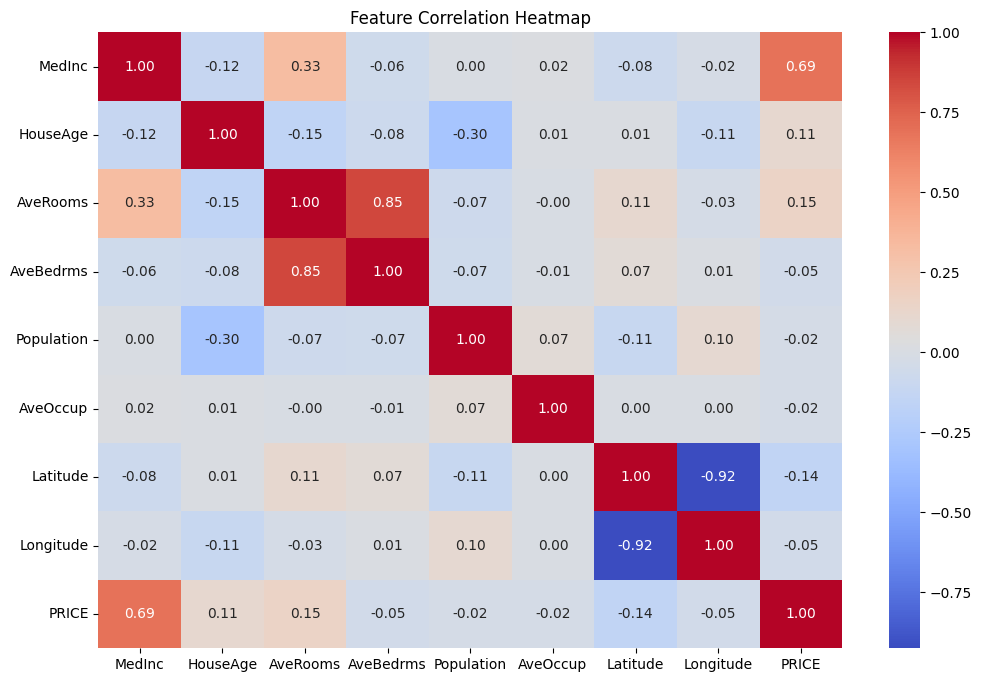

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Split the dataset into features (X) and target (y)
X= df.drop("PRICE", axis=1) # Independent variables
y= df["PRICE"] # Dependent variable

In [ ]:
# Train-test split(80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [ ]:
# Feature Scaling(Standardization)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# Train the Multiple Linear Regression Model
model= LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred= model.predict(X_test_scaled)

In [ ]:
# Model Evaluation
r2 = r2_score(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
rmse= np.sqrt(mse)

In [ ]:
# AIC and BIC Calculation (using stastsmodel) are essential tools in multiple linear regression for selecting the best model
X_train_const= sm.add_constant(X_train_scaled)
ols_model= sm.OLS(y_train, X_train_const).fit()
aic = ols_model.aic
bic = ols_model.bic

In [ ]:
# Print performance metrics
print("\nModel Evalutian Metrics:")
print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Akaike Information Criterion (AIC): {aic:.4f}")
print(f"Bayesian Information Criterion (BIC): {bic:.4f}")


Model Evalutian Metrics:
R-squared (R2): 0.5758
Mean Absolute Error (MAE): 0.5332
Mean Squared error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
Akaike Information Criterion (AIC): 36013.6303
Bayesian Information Criterion (BIC): 36083.0369


In [ ]:
# print actual vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test), color="red", linestyle="--"]) # line y= X
plt.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-25-4c6de2707d39>, line 7)

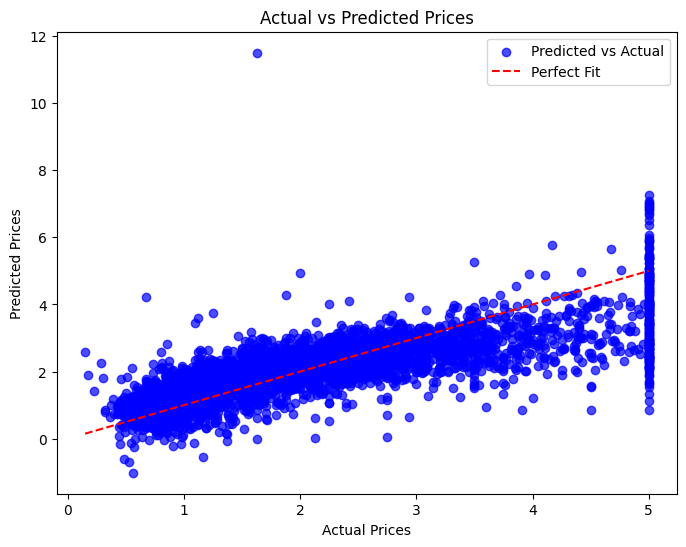

In [ ]:
# Print actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", label="Predicted vs Actual")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")

# Plot the line y = x (Perfect Prediction Line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")

plt.legend()
plt.show()


In [ ]:
# --- NEW FEATURE: USE INPUT PREDICTION---
print("\nEnter feature values to predict house price")

# Prompt user to enter values for all features
user_input = []
for feature in X.columns:
  value = float(input(f"Enter Value for {feature}:"))
  user_input.append(value)

# convert user input into a numpy array and scale it
user_input_array = np.array(user_input).reshape(1,-1)
user_input_scaled = scaler.transform(user_input_array)

# predict house price
predicted_price = model.predict(user_input_scaled)
print(f"\n Predicted House Price: ${Predicted_price(0)}:,.2f")


Enter feature values to predict house price
